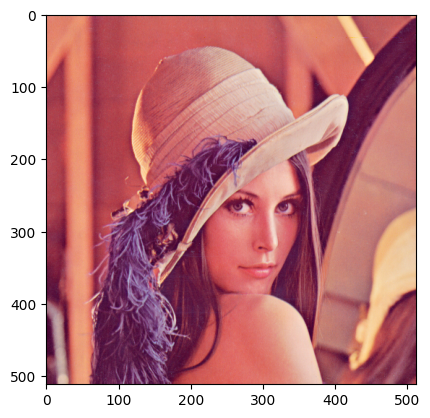

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
myPath=''
lena = cv.imread(myPath+'img/lena.png',1)
lenac = cv.cvtColor(lena, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.imshow(lenac)

Las imágenes pueden sumarse, pero es importante entender que cada pixel es una terna que va de 0 a 255. La suma aritmética va a estar acotada y la misma altera el valor de los pixeles

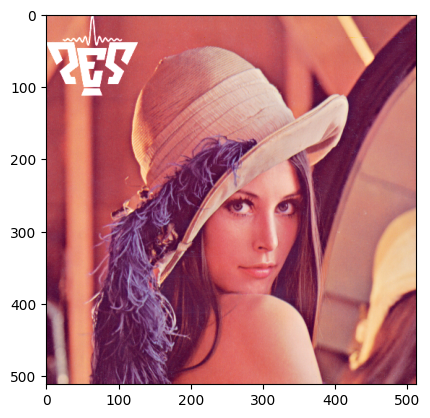

In [3]:
logo = cv.imread(myPath+'img/logo_pes.png',1)
added = cv.add(lena,logo) # Suma aritmetica
added = cv.cvtColor(added, cv.COLOR_BGR2RGB)
plt.imshow(added)

Tambien es posible sumar imágenes con un peso que da un efecto de transparencia.

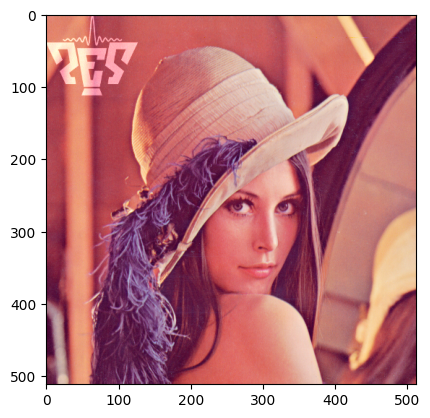

In [4]:
added= cv.addWeighted(lena,1,logo,0.4,0)
added = cv.cvtColor(added, cv.COLOR_BGR2RGB)
plt.imshow(added)

Ahora supongamos que quiero pegar otra imagen arriba, pero manteniendo el color orignal de ambas.
Una opción es hacer operaciones a nivel de bit (and, or, ...).

**Vamos a ponerle bigotes a Lena**

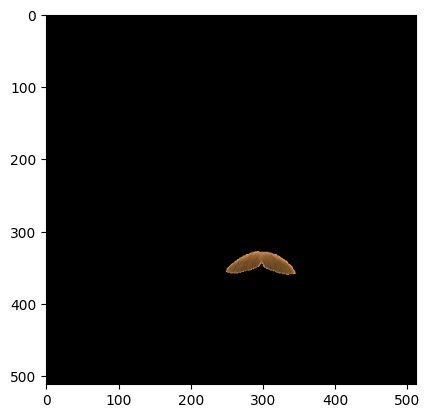

In [5]:
mos = cv.imread(myPath+'img/mostacho.png',1)
most = cv.cvtColor(mos, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.imshow(most)

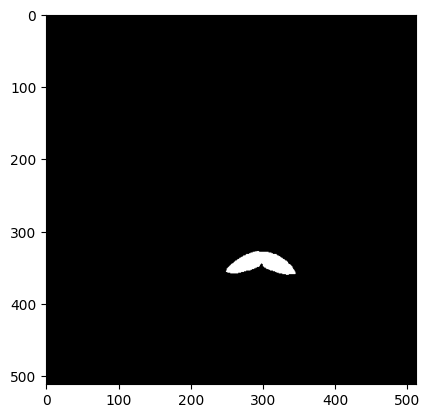

In [6]:
rows,cols,channels = mos.shape
roi = lena[0:rows, 0:cols ]  # Se define una ROI donde queda alineada la nueva imagen con el fondo

# Se crea una mascara
img2gray = cv.cvtColor(mos,cv.COLOR_BGR2GRAY) # Paso a gray
ret, mask = cv.threshold(img2gray, 30, 255, cv.THRESH_BINARY) # Se quedan con todos los elementos que superen el threshold
plt.imshow(mask, cmap='gray')


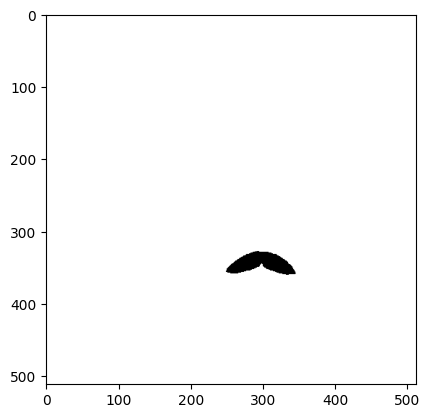

In [7]:
mask_inv = cv.bitwise_not(mask)  # Se invierte la mascara
plt.imshow(mask_inv, cmap='gray')

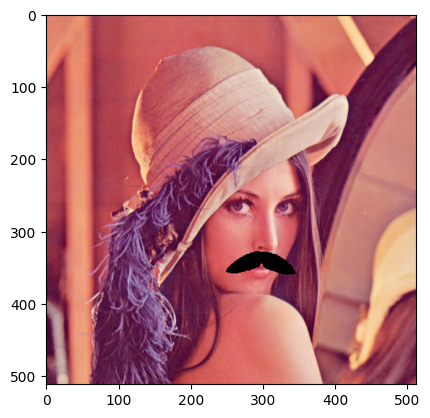

In [8]:
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv) # Imagen de fondo, orignal con recorte de nueva imagen
img_show = cv.cvtColor(img1_bg,cv.COLOR_BGR2RGB)
plt.imshow(img_show)

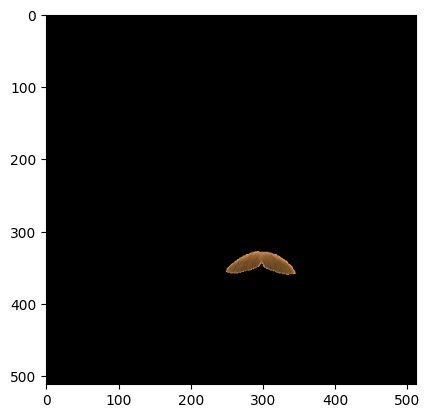

In [9]:
img2_fg = cv.bitwise_and(mos,mos,mask = mask) # Imagen nueva de frente
img2_fg_t = cv.cvtColor(img2_fg, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.imshow(img2_fg_t)

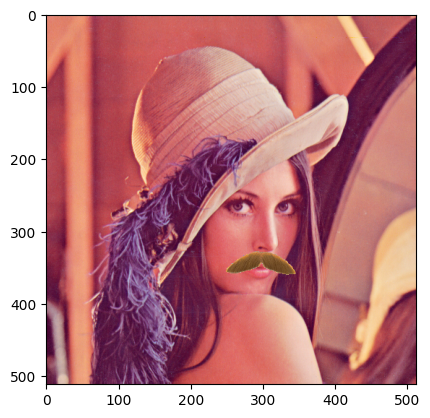

In [10]:
dst = cv.add(img1_bg,img2_fg) # Ahora si pueden sumarse, y no va a saturar
lena[0:rows, 0:cols ] = dst
lenap = cv.cvtColor(lena, cv.COLOR_BGR2RGB)
plt.imshow(lenap)
#cv2.imwrite('lenategobi.png',lena)